# Day 4:30 daily statistics

Pela necessidade do trabalho tive que fazer uso de um modelo de regressão quantilico. 

A regressão quantílica fornece uma imagem mais abrangente do efeito das variáveis independentes na variável dependente. Em vez de estimar o modelo com efeitos médios usando o modelo linear, a regressão de quantis produz efeitos diferentes ao longo da distribuição (quantis) da variável dependente. A variável dependente é contínua, sem zeros ou com muitos valores repetidos. O escolhido para aplicar a regressão quantilica estima os efeitos da renda familiar sobre os gastos com alimentos para famílias com gastos baixos e altos; e determinar os fatores que afetam as pontuações dos alunos ao longo de sua distribuição de pontuação.

Para uma leitura melhor sobre os fundamentos da distribuição quantílica acesse:

<https://docs.google.com/file/d/0BwogTI8d6EEiYmVzN0kyQ19CU3M/edit>

A base de dados pode ser obtida no seguinte endereço:
<https://docs.google.com/file/d/0BwogTI8d6EEiZG9tckVISXd4SzA/edit>

In [1]:
# install.packages("quantreg")
library(quantreg)

mydata<- read.csv("quantile_health.csv")
attach(mydata)

# Define variables
Y <- cbind(totexp)
X <- cbind(suppins, totchr, age, female, white)

# Descriptive statistics
summary(Y)
summary(X)

# OLS regression
olsreg <- lm(Y ~ X, data=mydata)
summary(olsreg)



Warning message:
"package 'quantreg' was built under R version 3.6.3"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.2"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



     totexp      
 Min.   :     3  
 1st Qu.:  1433  
 Median :  3334  
 Mean   :  7290  
 3rd Qu.:  7492  
 Max.   :125610  

    suppins           totchr           age            female      
 Min.   :0.0000   Min.   :0.000   Min.   :65.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:69.00   1st Qu.:0.0000  
 Median :1.0000   Median :2.000   Median :74.00   Median :1.0000  
 Mean   :0.5915   Mean   :1.809   Mean   :74.25   Mean   :0.5841  
 3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:79.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :7.000   Max.   :90.00   Max.   :1.0000  
     white       
 Min.   :0.0000  
 1st Qu.:1.0000  
 Median :1.0000  
 Mean   :0.9736  
 3rd Qu.:1.0000  
 Max.   :1.0000  


Call:
lm(formula = Y ~ X, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-16146  -5372  -2804    457 115461 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   461.492   2777.453   0.166  0.86805    
Xsuppins      585.984    436.309   1.343  0.17936    
Xtotchr      2528.079    164.834  15.337  < 2e-16 ***
Xage            6.711     33.768   0.199  0.84248    
Xfemale     -1239.866    433.110  -2.863  0.00423 ** 
Xwhite       2193.155   1327.794   1.652  0.09870 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11520 on 2949 degrees of freedom
Multiple R-squared:  0.07828,	Adjusted R-squared:  0.07672 
F-statistic: 50.09 on 5 and 2949 DF,  p-value: < 2.2e-16


In [2]:
# A regressão quantilica é apresentada a seguir

# Quantile regression
quantreg25 <- rq(Y ~ X, data=mydata, tau=0.25)
summary(quantreg25)

quantreg50 <- rq(Y ~ X, data=mydata, tau=0.5)
summary(quantreg50)

quantreg75 <- rq(Y ~ X, data=mydata, tau=0.75)
summary(quantreg75)


Warning message in summary.rq(quantreg25):
"2 non-positive fis"


Call: rq(formula = Y ~ X, tau = 0.25, data = mydata)

tau: [1] 0.25

Coefficients:
            Value       Std. Error  t value     Pr(>|t|)   
(Intercept) -1412.88889   433.20179    -3.26150     0.00112
Xsuppins      453.44444    75.05348     6.04162     0.00000
Xtotchr       782.47222    37.55769    20.83388     0.00000
Xage           16.08333     6.19162     2.59760     0.00943
Xfemale        16.05556    72.20278     0.22237     0.82404
Xwhite        338.08333    71.51522     4.72743     0.00000

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"


Call: rq(formula = Y ~ X, tau = 0.5, data = mydata)

tau: [1] 0.5

Coefficients:
            Value       Std. Error  t value     Pr(>|t|)   
(Intercept) -2252.55556   846.23023    -2.66187     0.00781
Xsuppins      687.22222   137.29264     5.00553     0.00000
Xtotchr      1332.83333    74.77913    17.82360     0.00000
Xage           35.11111    11.29450     3.10869     0.00190
Xfemale      -260.55556   150.46285    -1.73169     0.08343
Xwhite        632.88889   243.05734     2.60387     0.00926

Warning message in summary.rq(quantreg75):
"12 non-positive fis"


Call: rq(formula = Y ~ X, tau = 0.75, data = mydata)

tau: [1] 0.75

Coefficients:
            Value       Std. Error  t value     Pr(>|t|)   
(Intercept) -4512.04545  2350.56284    -1.91956     0.05501
Xsuppins      708.40909   375.76929     1.88522     0.05950
Xtotchr      2855.31818   196.12587    14.55860     0.00000
Xage           87.36364    30.98410     2.81963     0.00484
Xfemale      -554.59091   378.71501    -1.46440     0.14319
Xwhite        801.68182   370.96108     2.16109     0.03077

In [3]:
# Simultaneous quantile regression
quantreg2575 <- rq(Y ~ X, data=mydata, tau=c(0.25, 0.75))
summary(quantreg2575)

# ANOVA test for coefficient differences
anova(quantreg25, quantreg75)


Warning message in summary.rq(xi, U = U, ...):
"2 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"12 non-positive fis"


Call: rq(formula = Y ~ X, tau = c(0.25, 0.75), data = mydata)

tau: [1] 0.25

Coefficients:
            Value       Std. Error  t value     Pr(>|t|)   
(Intercept) -1412.88889   433.20179    -3.26150     0.00112
Xsuppins      453.44444    75.05348     6.04162     0.00000
Xtotchr       782.47222    37.55769    20.83388     0.00000
Xage           16.08333     6.19162     2.59760     0.00943
Xfemale        16.05556    72.20278     0.22237     0.82404
Xwhite        338.08333    71.51522     4.72743     0.00000

Call: rq(formula = Y ~ X, tau = c(0.25, 0.75), data = mydata)

tau: [1] 0.75

Coefficients:
            Value       Std. Error  t value     Pr(>|t|)   
(Intercept) -4512.04545  2350.56284    -1.91956     0.05501
Xsuppins      708.40909   375.76929     1.88522     0.05950
Xtotchr      2855.31818   196.12587    14.55860     0.00000
Xage           87.36364    30.98410     2.81963     0.00484
Xfemale      -554.59091   378.71501    -1.46440     0.14319
Xwhite        801.68182   370.9610

Warning message in summary.rq(x, se = se, R = R, covariance = TRUE):
"2 non-positive fis"Warning message in summary.rq(x, se = se, R = R, covariance = TRUE):
"12 non-positive fis"

Quantile Regression Analysis of Deviance Table

Model: Y ~ X
Joint Test of Equality of Slopes: tau in {  0.25 0.75  }

  Df Resid Df F value    Pr(>F)    
1  5     5905  37.831 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"Warning message in summary.rq(xi, U = U, ...):
"16 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"12 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"49 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"19 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"2 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"12 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"3 non-positive fis"Warning message in summary.rq(xi, U = U, ...):
"25 non-positive fis"

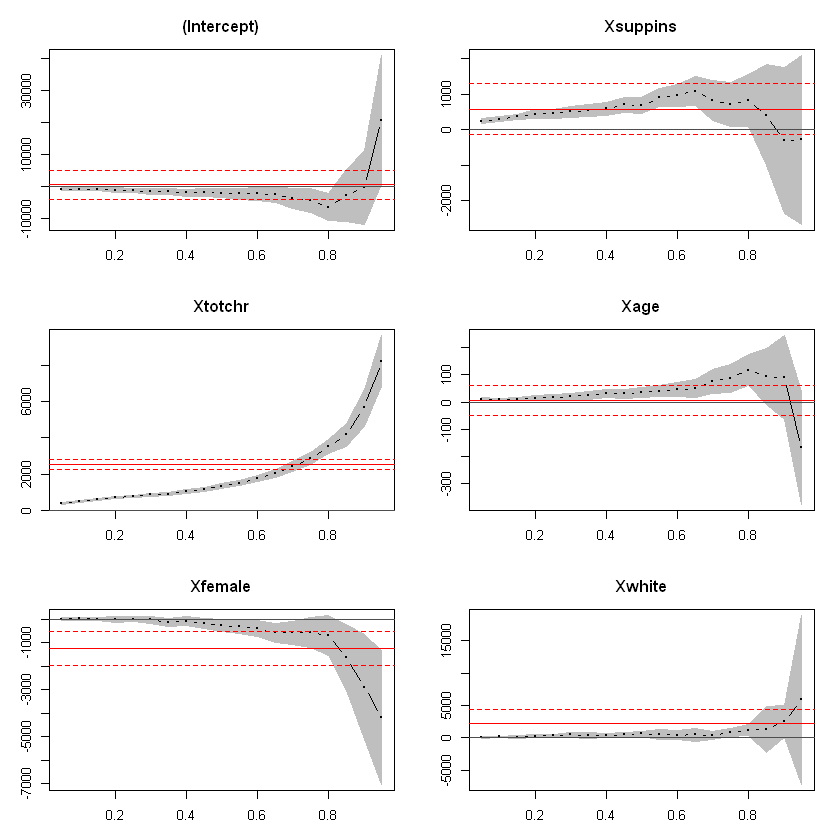

In [4]:
# Os gráficos para os quantis 25%, 50% e 75% são apresentados a seguir:

# Plotting data
quantreg.all <- rq(Y ~ X, tau = seq(0.05, 0.95, by = 0.05), data=mydata)
quantreg.plot <- summary(quantreg.all)
plot(quantreg.plot)
